# MSN 514 - Chapter 03: Schrödinger

In [1]:
import numpy as np
import matplotlib.pyplot as plt


#### Band Matrix Structuring

In [2]:
# Define the band matrix for given Na, k, and edge_effect parameters

def band_matrix(Na, k, edge_effect=True):
    t = -2.7                                        # base hopping (eV)
    a = 1                                           # unit cell length
    te = -2.7 * 1.12 if edge_effect else t          # edge hopping value
    
    if Na == 12:
        D = np.zeros((24, 24), dtype=complex)
        D[0, 1] = te; D[1, 0] = te;
        for i in range(4, 22, 4):
            D[i, i+1] = t; D[i+1, i] = t;
        for b in range(0, 22, 1):
            D[b, b+2] = t; D[b+2, b] = t;
        for c in range(2, 19, 4):
            D[c, c+1] = t * np.exp(-1j * k * a)
        for c in range(2, 19, 4):
            D[c+1, c] = t * np.exp(1j * k * a)
        D[22, 23] = te * np.exp(-1j * k * a)
        D[23, 22] = te * np.exp(1j * k * a)
        
    elif Na == 13:
        D = np.zeros((26, 26), dtype=complex)
        D[0, 1] = te; D[1, 0] = te;
        for i in range(4, 25, 4):
            D[i, i+1] = t; D[i+1, i] = t;
        for b in range(0, 24, 1):
            D[b, b+2] = t; D[b+2, b] = t;
        for c in range(2, 24, 4):
            D[c, c+1] = t * np.exp(-1j * k * a)
        for c in range(2, 26, 4):
            D[c+1, c] = t * np.exp(1j * k * a)
        D[24, 25] = te
        D[25, 24] = te
        
    elif Na == 14:
        D = np.zeros((28, 28), dtype=complex)
        D[0, 1] = te; D[1, 0] = te;
        for i in range(4, 26, 4):
            D[i, i+1] = t; D[i+1, i] = t;
        for b in range(0, 26, 1):
            D[b, b+2] = t; D[b+2, b] = t;
        for c in range(2, 24, 4):
            D[c, c+1] = t * np.exp(-1j * k * a)
        for c in range(2, 24, 4):
            D[c+1, c] = t * np.exp(1j * k * a)
        D[26, 27] = te * np.exp(-1j * k * a)
        D[27, 26] = te * np.exp(1j * k * a)
    else:
        raise ValueError("Na must be 12, 13, or 14.")
    return D


### Calculation of Band Structures with Edge Effect

In [3]:
# Computes the band structure with tracking for given Na and k points

def compute_bands_tracked(Na, kpts, edge_effect=True):

  Nk = len(kpts)
  dim = 2 * Na
  bands = np.zeros((Nk, dim))
  
  D0 = band_matrix(Na, kpts[0], edge_effect)
  eigvals0, _ = np.linalg.eig(D0)
  order0 = np.argsort(eigvals0.real)
  prev = eigvals0.real[order0]
  bands[0, :] = prev

  for i in range(1, Nk):
    k_val = kpts[i]
    D = band_matrix(Na, k_val, edge_effect)
    eigvals, _ = np.linalg.eig(D)
    current = eigvals.real.copy()
    new_order = np.zeros(dim)
    used = np.zeros(dim, dtype=bool)

    for j in range(dim):
      diff = np.abs(current - prev[j])
      diff[used] = np.inf
      min_idx = np.argmin(diff)
      new_order[j] = current[min_idx]
      used[min_idx] = True
    bands[i, :] = new_order
    prev = new_order.copy()
  return bands


### Running functions with different Na values

In [4]:
a = 1
kpts = np.linspace(0, np.pi/a, 1000) # k points, 1000 points between 0 and pi/a
Na_list = [12, 13, 14]

band_edge = {}
for Na in Na_list:
    band_edge[Na] = compute_bands_tracked(Na, kpts, edge_effect=True)

    band_noedge = {}
for Na in Na_list:
    band_noedge[Na] = compute_bands_tracked(Na, kpts, edge_effect=False)

### Plotting Edge Effects

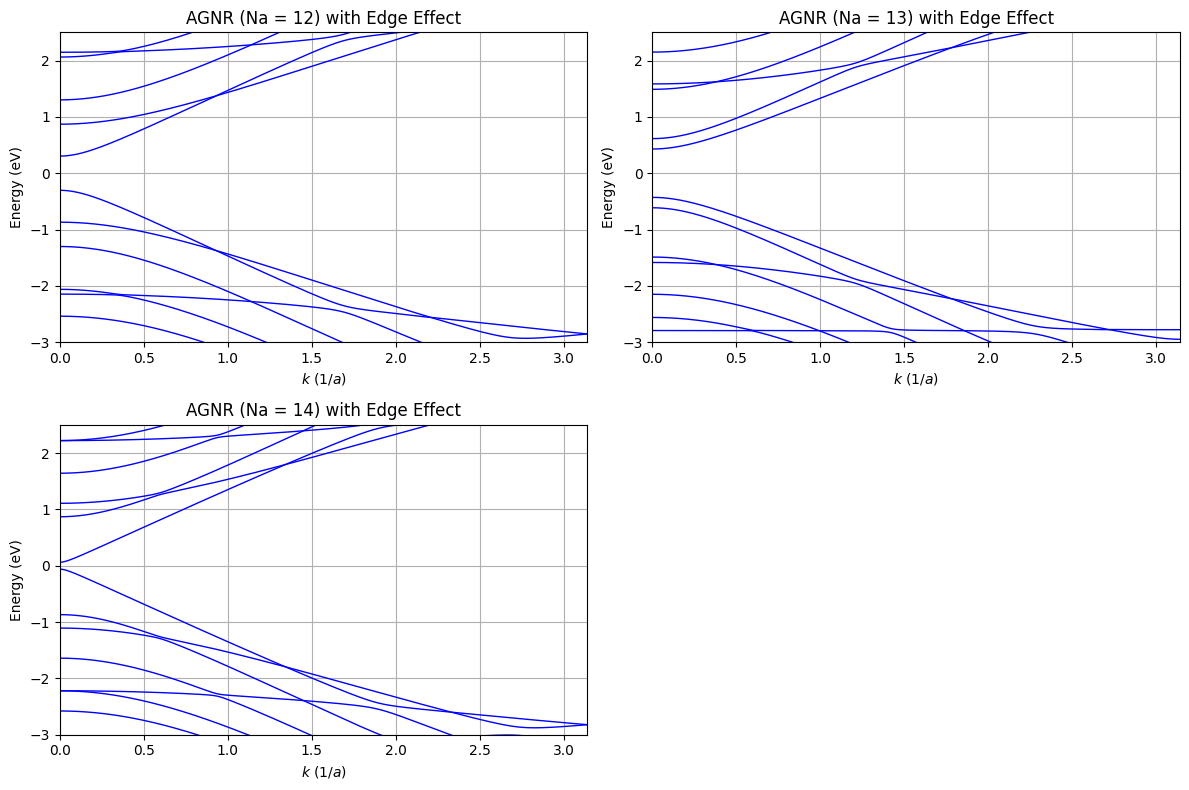

In [5]:
plt.figure(figsize=(12, 8))
for i, Na in enumerate(Na_list, start=1):
    plt.subplot(2, 2, i)
    E = band_edge[Na]
    for band in range(E.shape[1]):
        plt.plot(kpts, E[:, band], 'b-', lw=1)
    plt.title(f"AGNR (Na = {Na}) with Edge Effect")
    plt.xlabel(r"$k$ ($1/a$)")
    plt.ylabel("Energy (eV)")
    plt.xlim(0, np.pi)
    plt.ylim(-3, 2.5)
    plt.grid(True)
plt.tight_layout()
plt.show()


### Comparision of Edge Effect and No Edge Effect

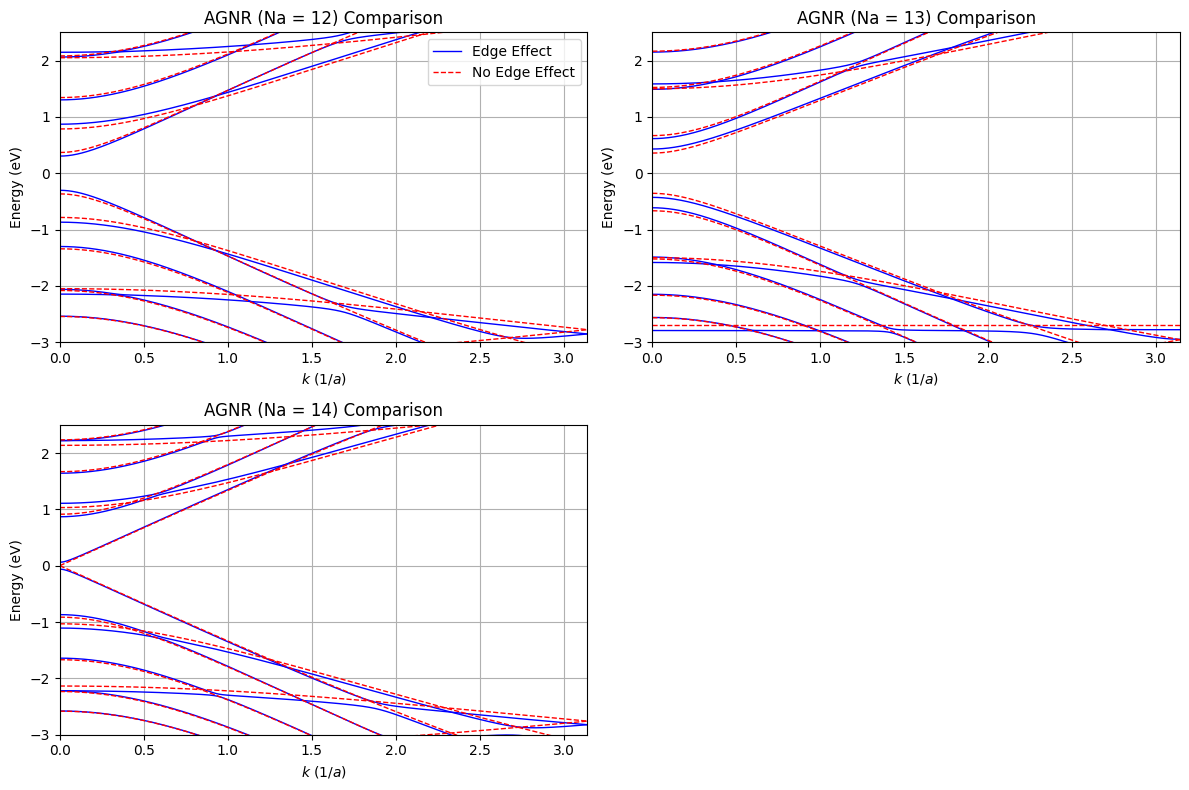

In [6]:
plt.figure(figsize=(12, 8))
for i, Na in enumerate(Na_list, start=1):
    plt.subplot(2, 2, i)
    E_edge = band_edge[Na]
    E_noedge = band_noedge[Na]
    for band in range(E_edge.shape[1]):
        plt.plot(kpts, E_edge[:, band], 'b-', lw=1, label="Edge Effect" if band==0 else "")
    for band in range(E_noedge.shape[1]):
        plt.plot(kpts, E_noedge[:, band], 'r--', lw=1, label="No Edge Effect" if band==0 else "")
    plt.title(f"AGNR (Na = {Na}) Comparison")
    plt.xlabel(r"$k$ ($1/a$)")
    plt.ylabel("Energy (eV)")
    plt.xlim(0, np.pi)
    plt.ylim(-3, 2.5)
    plt.grid(True)
    if i==1:
        plt.legend()
plt.tight_layout()
plt.show()


### Edge and No Edge Difference with L2

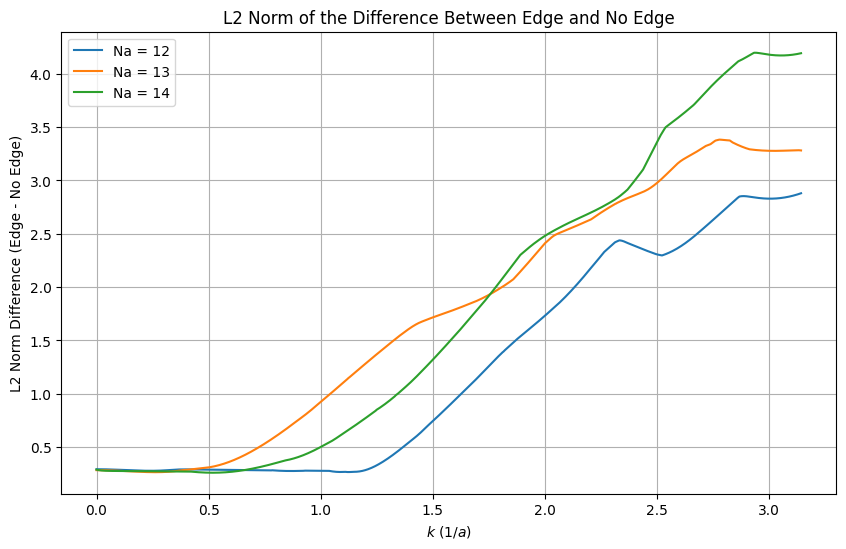

In [7]:
diff_norms = {}
for Na in Na_list:
    diff = band_edge[Na] - band_noedge[Na]
    diff_norm = np.linalg.norm(diff, axis=1)
    diff_norms[Na] = diff_norm

plt.figure(figsize=(10, 6))
for Na in Na_list:
    plt.plot(kpts, diff_norms[Na], label=f'Na = {Na}')
plt.xlabel(r"$k$ ($1/a$)")
plt.ylabel("L2 Norm Difference (Edge - No Edge)")
plt.title("L2 Norm of the Difference Between Edge and No Edge")
plt.legend()
plt.grid(True)
plt.show()